In [123]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [114]:
base_dir = "/Users/szhan/Projects/tsimpute/analysis/genealogy_only/"

In [144]:
sampling_time = "0"

In [145]:
in_prefix = "t" + str(sampling_time) + "_" + "p80"
in_dir = base_dir + in_prefix + "/"

results = None
for i in np.arange(1, 101):
    in_file = in_dir + "sim" + "_" + str(i) + ".csv"
    if os.path.exists(in_file):
        df = pd.read_csv(in_file, skiprows=16)
        results = df if results is None else pd.concat([results, df])

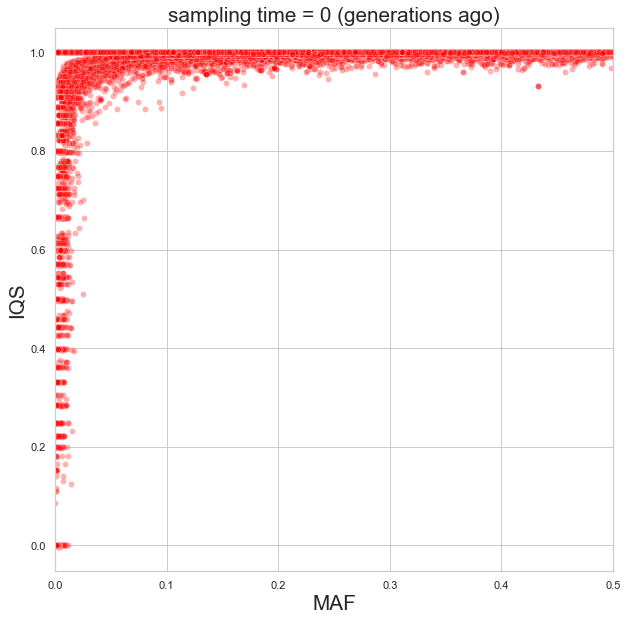

In [146]:
f, ax = plt.subplots(figsize=(10, 10))

ax.set_title(
    f"sampling time = {sampling_time} (generations ago)",
    size="xx-large"
)
ax.set_ylabel("IQS", size="xx-large")
ax.set_xlabel("MAF", size="xx-large")
ax.set_xlim([0, 0.50])

g = sns.scatterplot(
    x="maf",
    y="iqs",
    data=results,
    color="red",
    alpha=0.30,
    x_jitter=True
);

In [147]:
out_file = in_prefix + ".png"
g.get_figure().savefig(out_file)